In [10]:
import numpy as np 
from numpy import genfromtxt
from numpy import linalg as LA
import scipy
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
d = 50
beta = 0.1
m = 1
p = 50
met_list = ['Nelder-Mead', 'Powell', 'BFGS', 'L-BFGS-B', 'SLSQP', 'CG', 'TNC', 'COBYLA', 'Brent', 'Golden']
test_mets = np.zeros((len(met_list), 100))
test_times = np.zeros((len(met_list), 100))
index = 0
for met in met_list:
    df2 = pd.read_csv('quad_sd_minimize_met_%s_beta_%s_m=%s_d=%s_p=%s_All.csv' % (met, beta, m, d, p))
    test_mets[index, :] = np.array(df2['number_minimas_per_func_multistart'])
    test_times[index, :] = np.array(df2['time_multistart'])
    index += 1

In [7]:
for j in range(len(met_list)):
    for i in range(j, len(met_list)):
        test_1 = test_mets[j]
        test_2 = test_mets[i]
        assert(test_1.shape[0] == 100)
        assert(test_2.shape[0] == 100)
        assert(np.all(test_1 == test_2))

In [13]:
def box_plots_time(times, met_list, d, p):
    plt.figure(figsize=(15, 5))
    plt.boxplot(times)
    xlabels = met_list
    plt.xticks(np.arange(1, len(met_list) + 1), xlabels, size=12)
    plt.yticks(size=12)
    plt.ylabel(r'Time (s)', size=12)

    plt.savefig('time_quad_d_%s_p_%s.pdf' %
                (d, p), bbox_inches="tight")
    plt.show()

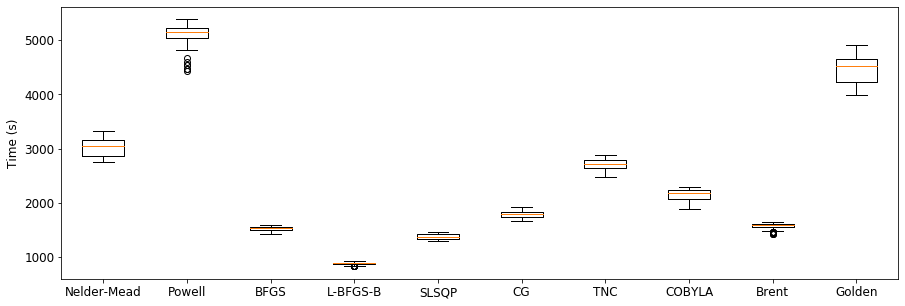

In [15]:
box_plots_time(test_times.T, met_list, d, p)